In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

from ipywidgets import interact

np.random.seed(1234)

In [4]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

In [5]:
def computeCost(X, y, w):
    m = len(y)
    J = 0
    
    h = X @ w
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [6]:
def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

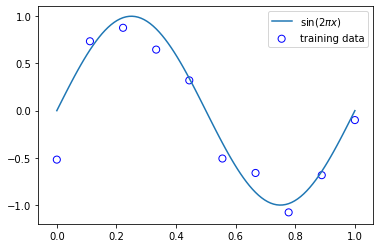

In [7]:
# plot generated data above
plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
plt.legend()
plt.show()

In [8]:
@interact
def linear_regression_normal_eq(alpha = [0, 0.00001, 0.0001, 0.001, 0.003, 0.1]):
    X_train = PolynomialFeatures(11).fit_transform(x_train.reshape(-1,1))
    X_test = PolynomialFeatures(11).fit_transform(x_test.reshape(-1,1))
    w = np.linalg.solve(alpha * np.eye(np.size(X_train, 1)) + X_train.T @ X_train, X_train.T @ y_train)
    y = X_test @ w
    
    m = len(y)
    cost = (1/(2*m)) * np.sum((y - y_test)**2)
    print(cost)
    print(computeCost(X_test, y_test, w))
    print(w)
    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y_test, label="$\sin(2\pi x)$")
    plt.plot(x_test, y, label="prediction")
    plt.legend()
    plt.show()


interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.003, 0.1), value=0), O…

In [9]:
def gradientDescent(X, y, learning_rate=0.1, alpha=0.01, num_iters=150000):
    m = len(y)
    w = np.zeros(X.shape[1])
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X @ w
        w = w - learning_rate*(1/m)*(X.T @ (h-y)) - alpha*(1/m)*w
        J_history[iter] = computeCost(X, y, w)
    return(w, J_history)

In [16]:
x_train1, y_train1 = create_toy_data(sinusoidal, 5, 0.45)
x_test1 = np.linspace(0, 1, 100)
y_test1 = sinusoidal(x_test1)

@interact
def linear_regression_GD(alpha = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]):
    X_train1 = PolynomialFeatures(11).fit_transform(x_train1.reshape(-1,1))
    X_test1 = PolynomialFeatures(11).fit_transform(x_test1.reshape(-1,1))
    w , Cost_J = gradientDescent(X_train1, y_train1, alpha=alpha)

    #plt.plot(Cost_J)
    #plt.ylabel('Cost J')
    #plt.xlabel('Iterations');

    print(computeCost(X_test1, y_test1, w))

    y = X_test1 @ w
    plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test1, y_test1, label="$\sin(2\pi x)$")
    plt.plot(x_test1, y, label="prediction")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.3), value=0…

In [17]:
def stochasticGradientDescent(X, y, learning_rate=0.1, alpha=0.01, num_iters=150000):
    m = len(y)
    w = np.zeros(X.shape[1])
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        for i in range (m):
            h = X[i,:] @ w
            w = w - learning_rate*(1/m)*(X[i,:].T @ (h-y)) - alpha*(1/m)*w
            J_history[iter] = computeCost(X, y, w)
    return(w, J_history)

In [18]:
x_train2, y_train2 = create_toy_data(sinusoidal, 5, 0.45)
x_test2 = np.linspace(0, 1, 100)
y_test2 = sinusoidal(x_test1)

@interact
def linear_regression_SGD(alpha = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.3]):
    X_train2 = PolynomialFeatures(11).fit_transform(x_train2.reshape(-1,1))
    X_test2 = PolynomialFeatures(11).fit_transform(x_test2.reshape(-1,1))
    w , Cost_J = gradientDescent(X_train2, y_train2, alpha=alpha)

    #plt.plot(Cost_J)
    #plt.ylabel('Cost J')
    #plt.xlabel('Iterations');

    print(computeCost(X_test2, y_test2, w))

    y = X_test2 @ w
    plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test2, y_test2, label="$\sin(2\pi x)$")
    plt.plot(x_test2, y, label="prediction")
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='alpha', options=(0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.3), value=0…